In [1]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import glob

In [2]:
# check file names
for file in glob.glob('data/*.gz'):
    city = str.title(str(file).split('/')[1].split('_')[0])
    print(file," ",city)

data/eldoret_weather.gz   Eldoret
data/kakamega_weather.gz   Kakamega
data/kisumu_weather.gz   Kisumu
data/malindi_weather.gz   Malindi
data/mombasa_weather.gz   Mombasa
data/nairobi_weather.gz   Nairobi
data/narok_weather.gz   Narok
data/nyeri_weather.gz   Nyeri


In [26]:
# load files
# create empty dataframe
data = pd.DataFrame()

for file in glob.glob('data/*.gz'):
    try:
        df = pd.read_csv(file,sep=";",skiprows=6,index_col=False,
                 encoding='UTF-8', low_memory=False)
        # rename the first column
        df = df.rename(columns={df.columns[0]:'Time'})
        # get city name & add to dataframe
        city = str.title(str(file).split('/')[1].split('_')[0])
        df.insert(loc=0,column='City',value= city)
        # append df to data
        data = data.append(df,ignore_index=False)
        print(city,"weather data has",df.shape[0],"rows and",df.shape[1], "columns")
    except Exception as e:
        print("Error reading data from this file: ", file, e)

# drop blank column
data = data.drop('Unnamed: 13',axis=1)

Eldoret weather data has 22169 rows and 30 columns
Kakamega weather data has 47344 rows and 15 columns
Kisumu weather data has 22554 rows and 30 columns
Malindi weather data has 24313 rows and 30 columns
Mombasa weather data has 24307 rows and 30 columns
Nairobi weather data has 21545 rows and 30 columns
Narok weather data has 47364 rows and 15 columns
Nyeri weather data has 35 rows and 15 columns


In [27]:
# check shape of data
data.shape

(209631, 33)

In [28]:
# column names
cols = [x for x in data.columns]
print(cols)

['City', 'Time', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', "E'", 'sss', 'P0', "W'W'", 'c']


In [29]:
# top rows
data.head()

,City,Time,T,Po,P,Pa,U,DD,Ff,ff10,...,Td,RRR,tR,E,Tg,E',sss,P0,W'W',c
0,Eldoret,29.12.2020 09:00,18.4,NaN,NaN,NaN,51.0,Wind blowing from the south-east,7.0,NaN,...,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eldoret,29.12.2020 03:00,13.4,NaN,NaN,NaN,67.0,variable wind direction,1.0,NaN,...,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Eldoret,29.12.2020 00:00,14.8,NaN,NaN,NaN,56.0,Wind blowing from the south,4.0,NaN,...,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Eldoret,28.12.2020 21:00,14.0,NaN,NaN,NaN,58.0,Wind blowing from the south-east,5.0,NaN,...,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Eldoret,28.12.2020 18:00,23.4,NaN,NaN,NaN,31.0,Wind blowing from the south-east,5.0,NaN,...,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# bottom rows
data.tail()

,City,Time,T,Po,P,Pa,U,DD,Ff,ff10,...,Td,RRR,tR,E,Tg,E',sss,P0,W'W',c
30,Nyeri,28.12.2020 02:00,16.0,NaN,765.0,NaN,72.0,Wind blowing from the north,3.0,NaN,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,631.4,NaN,No Significant Clouds
31,Nyeri,28.12.2020 01:30,16.0,NaN,765.0,NaN,72.0,Wind blowing from the north,4.0,NaN,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,631.4,NaN,No Significant Clouds
32,Nyeri,28.12.2020 01:00,16.0,NaN,765.0,NaN,72.0,Wind blowing from the north,3.0,NaN,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,631.4,NaN,No Significant Clouds
33,Nyeri,28.12.2020 00:30,16.0,NaN,765.8,NaN,77.0,Wind blowing from the north,3.0,NaN,...,12.0,NaN,NaN,NaN,NaN,NaN,NaN,632.1,NaN,No Significant Clouds
34,Nyeri,28.12.2020 00:00,16.0,NaN,765.8,NaN,72.0,Wind blowing from the north,3.0,NaN,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,632.1,NaN,No Significant Clouds


In [31]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209631 entries, 0 to 34
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   City    209631 non-null  object 
 1   Time    209631 non-null  object 
 2   T       208442 non-null  float64
 3   Po      36358 non-null   float64
 4   P       142124 non-null  float64
 5   Pa      24286 non-null   float64
 6   U       207834 non-null  float64
 7   DD      207879 non-null  object 
 8   Ff      207934 non-null  float64
 9   ff10    4 non-null       float64
 10  ff3     0 non-null       float64
 11  N       114832 non-null  object 
 12  WW      119542 non-null  object 
 13  W1      12309 non-null   object 
 14  W2      12306 non-null   object 
 15  Tn      16201 non-null   float64
 16  Tx      16217 non-null   float64
 17  Cl      111880 non-null  object 
 18  Nh      112588 non-null  object 
 19  H       113135 non-null  object 
 20  Cm      101567 non-null  object 
 21  Ch      79471 

In [32]:
# calculate % of missing values
percent_missing_vals = np.round(data.isnull().mean()*100,2)
missing_vals_df = pd.DataFrame({'column_name':data.columns,'pct_missing':percent_missing_vals})
missing_vals_df = missing_vals_df.sort_values('pct_missing',ascending=False)
missing_vals_df = missing_vals_df.reset_index(drop=True)
missing_vals_df

,column_name,pct_missing
0,Tg,100.00
1,ff3,100.00
2,E,100.00
3,ff10,100.00
4,sss,99.99
5,E',99.99
6,W'W',99.42
7,W2,94.13
8,W1,94.13
9,Tn,92.27


In [33]:
# select columns with more than
# 94% missing data
cols_to_drop = [x for x in missing_vals_df[missing_vals_df['pct_missing']>94]['column_name']]
cols_to_drop

# data = data.drop(cols_to_drop,axis=1)
# data.head()

['Tg', 'ff3', 'E', 'ff10', 'sss', "E'", "W'W'", 'W2', 'W1']

In [34]:
data.head(3)

,City,Time,T,Po,P,Pa,U,DD,Ff,ff10,...,Td,RRR,tR,E,Tg,E',sss,P0,W'W',c
0,Eldoret,29.12.2020 09:00,18.4,NaN,NaN,NaN,51.0,Wind blowing from the south-east,7.0,NaN,...,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eldoret,29.12.2020 03:00,13.4,NaN,NaN,NaN,67.0,variable wind direction,1.0,NaN,...,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Eldoret,29.12.2020 00:00,14.8,NaN,NaN,NaN,56.0,Wind blowing from the south,4.0,NaN,...,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Temperature Analysis

In [122]:
# split time into date & time
clean_data = data.copy()
clean_data[['Date','Time']] = clean_data['Time'].str.split(" ",expand=True)

# clean date
clean_data['Date'] = pd.to_datetime(clean_data['Date'])
clean_data['Year'] = clean_data['Date'].dt.year
clean_data['Month'] = clean_data['Date'].dt.month
clean_data['Day'] = clean_data['Date'].dt.day

In [123]:
clean_data.head(3)

,City,Time,T,Po,P,Pa,U,DD,Ff,ff10,...,Tg,E',sss,P0,W'W',c,Date,Year,Month,Day
0,Eldoret,09:00,18.4,NaN,NaN,NaN,51.0,Wind blowing from the south-east,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-29,2020,12,29
1,Eldoret,03:00,13.4,NaN,NaN,NaN,67.0,variable wind direction,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-29,2020,12,29
2,Eldoret,00:00,14.8,NaN,NaN,NaN,56.0,Wind blowing from the south,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-29,2020,12,29


In [124]:
clean_data['T'] = clean_data['T'].fillna(clean_data['T'].mean())

##### Summarize Temperature by Date

In [125]:
city_temp_by_date = clean_data.groupby(['City','Date'])['T'].mean().rename('Temp').reset_index()
city_temp_by_date = city_temp_by_date.sort_values(by=['City','Date'], ascending=True)
city_temp_by_date.head()

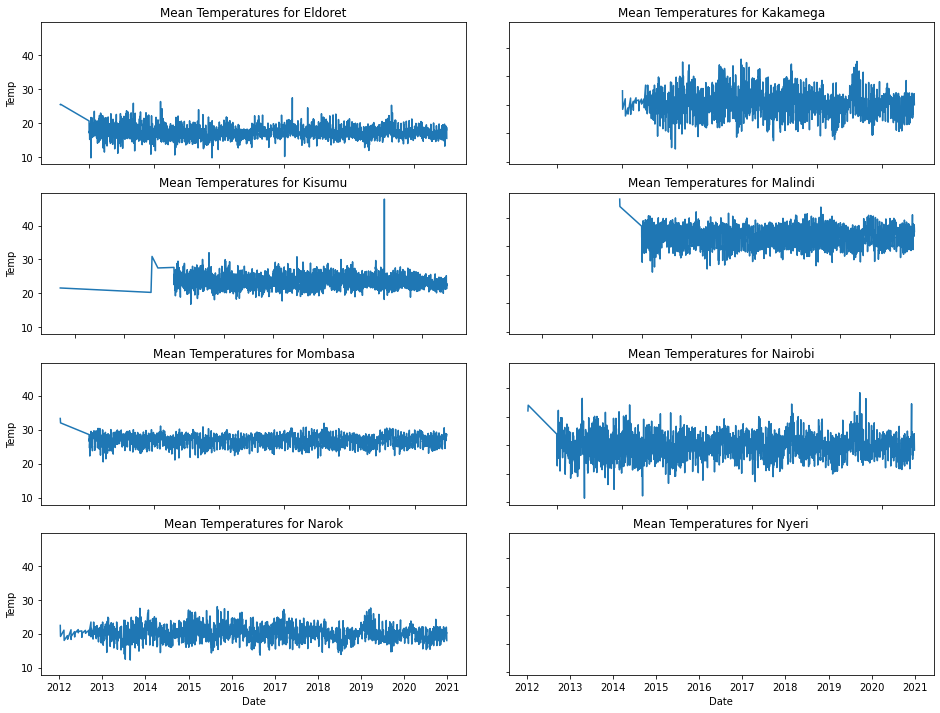

In [114]:
# plot mean temperatures by city
cities = [x for x in city_temp_by_date['City'].unique()]

fig = plt.figure(figsize=(16,12))
gs = fig.add_gridspec(4, 2, hspace=0.2, wspace=0.1)
(ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7,ax8) = gs.subplots(sharey='col',sharex='row')

# get axes list
axes_list = [x for x in fig.axes]

# plot data
for i in range(len(cities)):
    filtered_data = city_temp_by_date[city_temp_by_date['City']==cities[i]]
    sns.lineplot(x='Date',y='Temp',data = filtered_data,ax=axes_list[i])
    axes_list[i].set_title('Mean Temperatures for ' + cities[i])


# remove inside labels
for ax in axes_list:
    ax.label_outer()

#### Summarize Temperatures by Month

In [128]:
city_temp_by_month = clean_data.groupby(['City','Year','Month'])['T'].mean().rename('Temp').reset_index()
city_temp_by_month = city_temp_by_month.sort_values(by=['City','Year','Month'], ascending=True)
city_temp_by_month.head()

,City,Year,Month,Temp
0,Eldoret,2009,2,25.550000
1,Eldoret,2010,1,17.084211
2,Eldoret,2010,2,18.058735
3,Eldoret,2010,3,18.219795
4,Eldoret,2010,4,17.866935


In [139]:
# mean temperatures by month
mean_temp_by_month = clean_data.groupby(['Year'])['T'].mean().rename('Temp').reset_index()
mean_temp_by_month = mean_temp_by_month.sort_values(by=['Year'], ascending=True)
mean_temp_by_month.head()

,Year,Temp
0,2005,21.600000
1,2009,28.490909
2,2010,23.511971
3,2011,23.076564
4,2012,22.338165


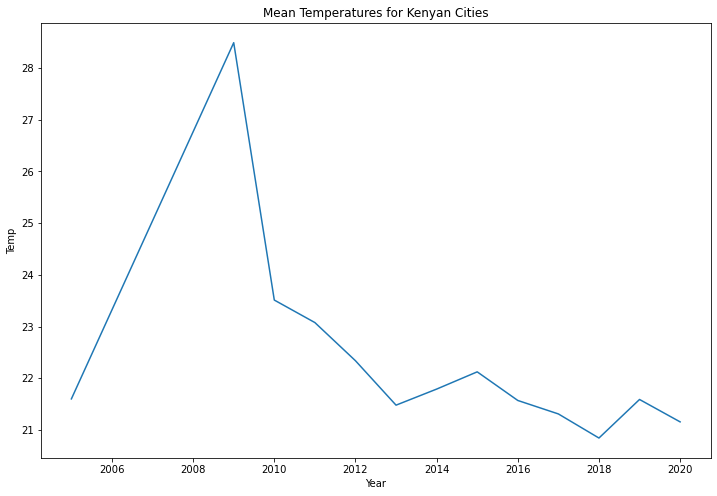

In [140]:
# plot distribution
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='Year',y='Temp',data=mean_temp_by_month,ax=ax)
plt.title('Mean Temperatures for Kenyan Cities')
plt.show()

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r',
'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 
'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r',
'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia',
'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 
'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r',
'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r',
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 
'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 
'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',
'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 
'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c',
'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 
    'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [11]:
# check temperature change over time
# for each town
# fig,ax = plt.subplots(figsize=(16,8))
# sns.lineplot(x='Time',y='T',hue='City',data=data,ax=ax)
# plt.show()

In [12]:
# data[data['sss'].isnull()==False]